In [1]:
# ignoring warnings
import warnings
warnings.filterwarnings('ignore', category = DeprecationWarning)

## Importing libraries

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

## Dataset Overview

In [3]:
df_train = pd.read_json("cooking_train.json");
df_test = pd.read_json("cooking_test.json");

In [4]:
df_train.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [5]:
df_test.head()

,id,ingredients
0,18009,"[baking powder, eggs, all-purpose flour, raisi..."
1,28583,"[sugar, egg yolks, corn starch, cream of tarta..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil..."
3,29752,"[meat cuts, file powder, smoked sausage, okra,..."
4,35687,"[ground black pepper, salt, sausage casings, l..."


## Checking out Dataset

In [6]:
print(df_train.shape)
print(df_train.columns)

(39774, 3)
Index(['id', 'cuisine', 'ingredients'], dtype='object')


In [7]:
print(df_test.shape)
print(df_test.columns)

(9944, 2)
Index(['id', 'ingredients'], dtype='object')


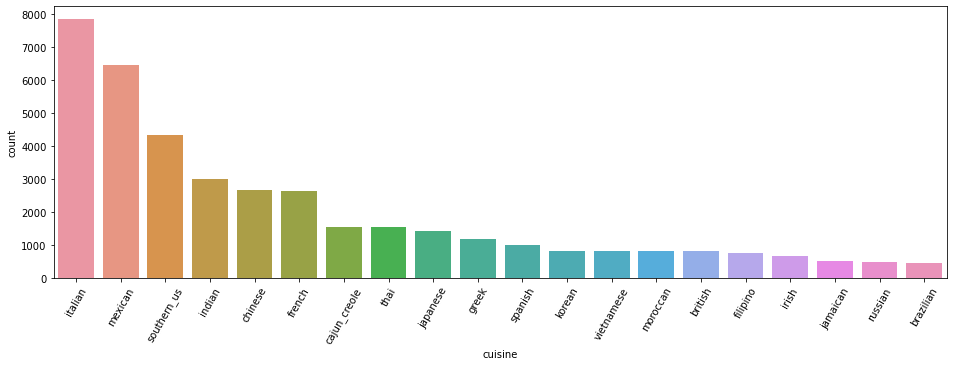

In [9]:
plt.figure(figsize=(16,5))
plt.xticks(rotation=60)
ax = sns.countplot(x='cuisine', data=df_train, order=df_train['cuisine'].value_counts().index)

In [10]:
print("Max number of ingredients in a recipe: ", df_train['ingredients'].str.len().max())
print("Max number of ingredients in a recipe: ", df_train['ingredients'].str.len().min())

Max number of ingredients in a recipe:  65
Max number of ingredients in a recipe:  1


__Create list of words in each recipe row__

In [11]:
# split into training set and testing set

# training set
ingredients_train = df_train.ingredients
words_train = [' '.join(x) for x in ingredients_train]
print(len(words_train), words_train[0])

# test set
ingredients_test = df_test.ingredients
words_test = [' '.join(x) for x in ingredients_test]

39774 romaine lettuce black olives grape tomatoes garlic pepper purple onion seasoning garbanzo beans feta cheese crumbles


__Create a word vector based on the training set__

In [12]:
vectorizer = CountVectorizer(max_features = 1000)
bag_of_words = vectorizer.fit(words_train)
bag_of_words

CountVectorizer(max_features=1000)

__Transform the word lists into vectors using the vectorizer trained on the training data__

In [13]:
ing_array_train = bag_of_words.transform(words_train).toarray()
ing_array_test = bag_of_words.transform(words_test).toarray()
ing_array_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

__Incorporate the word vectors into the train and test dataframes__

In [14]:
df_ing_train = pd.DataFrame(ing_array_train, columns=vectorizer.vocabulary_)
df_ing_test = pd.DataFrame(ing_array_test, columns=vectorizer.vocabulary_)
df_ing_train.head()

,romaine,lettuce,black,olives,grape,tomatoes,garlic,pepper,purple,onion,...,liver,muffin,stick,chow,fusilli,fronds,flavor,fajita,chayotes,american
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [15]:
df_train_new = df_train.merge(df_ing_train, 
                          left_index=True, 
                          right_index=True).drop('ingredients', axis=1)
df_train_new.head()

,id,cuisine,romaine,lettuce,black,olives,grape,tomatoes,garlic,pepper,...,liver,muffin,stick,chow,fusilli,fronds,flavor,fajita,chayotes,american
0,10259,greek,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25693,southern_us,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,20130,filipino,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,22213,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13162,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [16]:
df_test_new = df_test.merge(df_ing_test, 
                          left_index=True, 
                          right_index=True).drop('ingredients', axis=1)
df_test_new.head()

,id,romaine,lettuce,black,olives,grape,tomatoes,garlic,pepper,purple,...,liver,muffin,stick,chow,fusilli,fronds,flavor,fajita,chayotes,american
0,18009,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,28583,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,41580,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,29752,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,35687,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


__Create sets__

In [20]:
X = df_train_new.drop(['id', 'cuisine'], axis=1)
y = df_train_new.cuisine
X.shape, y.shape

((39774, 1000), (39774,))

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.85)
X_train.shape, X_val.shape

((33807, 1000), (5967, 1000))

__Create random forest, KNN__

In [33]:
# import dependencies
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

my_RandomForest = RandomForestClassifier(n_estimators=19, bootstrap=True, random_state=3)
my_RandomForest.fit(X_train, y_train)

my_knn = KNeighborsClassifier(n_neighbors=5)
my_knn.fit(X_train, y_train)

KNeighborsClassifier()

__Testing accuracy of RF, KNN__

In [34]:
y_predict_knn = my_knn.predict(X_val)
my_rf_predict = my_RandomForest.predict(X_val)

knn_accuracy = accuracy_score(y_val, y_predict_knn)
rf_accuracy = accuracy_score(y_val, my_rf_predict)

print("random forrest accuracy", rf_accuracy)
print("knn accuracy", knn_accuracy)

random forrest accuracy 0.7472766884531591
knn accuracy 0.6410256410256411
